#### The computer scientist Yann LeCun famously said that 
```
“if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake.”
```

###  Few Applications of Unsupervised Learning
* #### Clustering
```
    The goal is to group similar instances together into clusters. Clustering is a great
    tool for data analysis, customer segmentation, recommender systems, search
    engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.
```

* #### Anomaly detection
```
    The objective is to learn what “normal” data looks like, and then use that to
    detect abnormal instances, such as defective items on a production line or a new
    trend in a time series.
```

* #### Density estimation
```
    This is the task of estimating the probability density function (PDF) of the random
    process that generated the dataset. Density estimation is commonly used for
    anomaly detection: instances located in very low-density regions are likely to be
    anomalies. It is also useful for data analysis and visualization.
```

## Clustering


#### Applications of Clustering -
- customer segmentation
- data analysis
- dimensionality reduction technique
- anomaly detection (also called outlier detection)
- semi-supervised learning (only few labels are present)
- search engines
- segment an image (object detection & tracking)

```
Computational COmplexity of K-Means Algo depends if data has clustering structure.
Clustering structure? Linear Complexity if not, Exponential Complexity
In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms.
```
---

## Choosing Wrong Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

df = pd.read_csv('customer_data.csv')

df.head()

df.reset_index(drop=True,inplace=True)

### Customer Segmentation, using all features

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
labels

y_kmeans = kmeans.fit_predict(X)
y_kmeans is kmeans.labels_

In [34]:
# Center points are not distinct enough
kmeans.cluster_centers_

array([[1.88372093e+00, 2.50000000e+00, 4.55606977e+03, 1.10055000e+04,
        1.74618721e+04, 1.38846512e+03, 7.55961628e+03, 1.53108140e+03],
       [1.21698113e+00, 2.59433962e+00, 2.37108491e+04, 3.88205660e+03,
        5.16931132e+03, 3.77244340e+03, 1.11826415e+03, 1.69310377e+03],
       [2.00000000e+00, 2.50000000e+00, 1.81924000e+04, 3.53616000e+04,
        4.80522000e+04, 3.30840000e+03, 2.35349000e+04, 4.46110000e+03],
       [1.00000000e+00, 2.46153846e+00, 5.64533077e+04, 1.00262308e+04,
        8.73900000e+03, 1.55180769e+04, 1.25823077e+03, 7.17053846e+03],
       [1.14666667e+00, 2.54222222e+00, 6.48507556e+03, 3.14857333e+03,
        3.79895556e+03, 2.65575111e+03, 1.09994667e+03, 9.86546667e+02]])

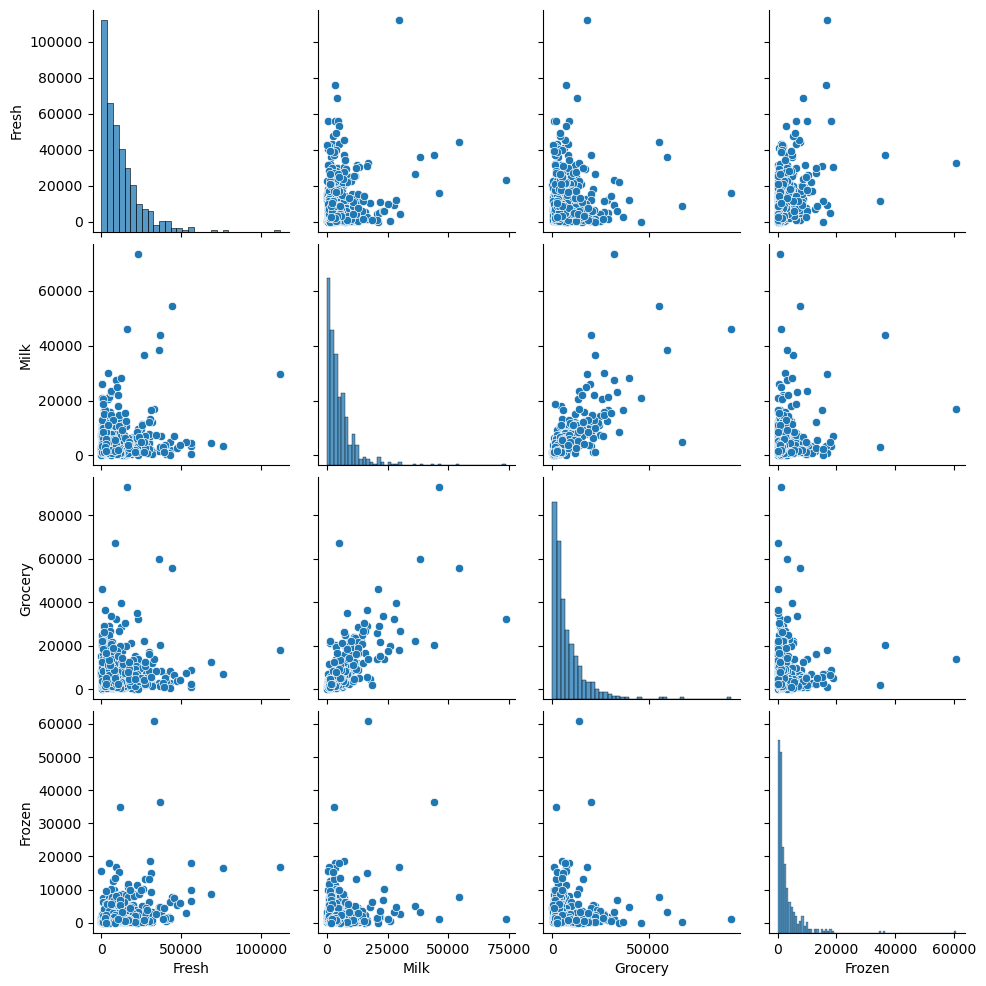

In [71]:
cols = ["Fresh", "Milk", "Grocery", "Frozen"]
sns.pairplot(df[cols])
plt.show()


### Using Elbow Method to find optimal n_clusters

In [48]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log-transform to reduce skew (add 1 to avoid log(0))
X_log = np.log1p(X)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)


<function matplotlib.pyplot.show(close=None, block=None)>

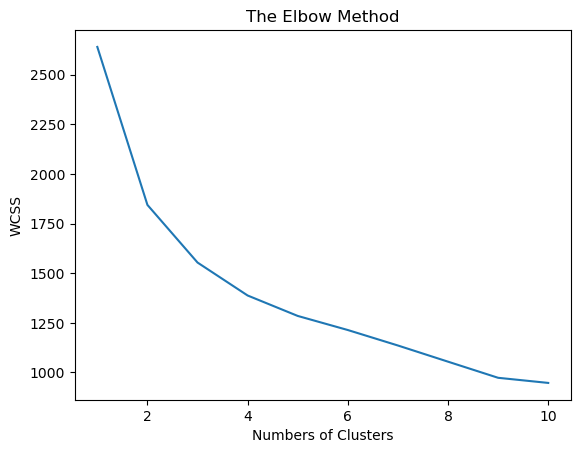

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# X = df.drop(columns=["Channel", "Region"]).values 
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show

#### WCSS dropping slowly or Sloppy Elbow

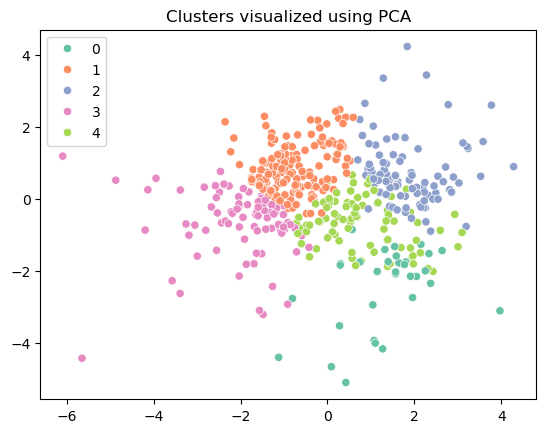

In [51]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='Set2')
plt.title("Clusters visualized using PCA")
plt.show()


### All points near origin or skewed, even after scaling

In [72]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.19165609775268222


### Silhouette Score < 0.2
```
Ranges from -1 to 1.
    > 0.5 → clear clusters.
    ~ 0.2-0.4 → overlapping.
    < 0 → terrible clustering.
```
---

In [73]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X_scaled, kmeans.labels_)
print("DB Index:", score)  # Lower is better


DB Index: 1.5334619900175965


### No Idea, more research required

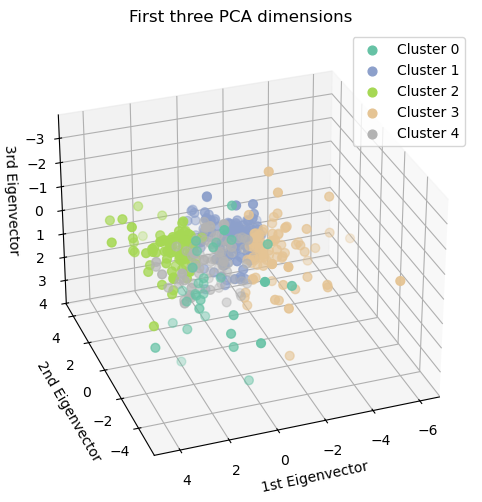

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D plotting is enabled
import numpy as np

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

pca = PCA(n_components=3).fit_transform(X_scaled)
labels = kmeans.labels_
unique_labels = np.unique(labels)
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster separately to get correct legend
for i, label in enumerate(unique_labels):
    ax.scatter(
        pca[labels == label, 0],
        pca[labels == label, 1],
        pca[labels == label, 2],
        s=40,
        color=colors[i],
        label=f"Cluster {label}"
    )

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

plt.legend()
plt.show()


## Importing new dataset and running some tests

In [74]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
X_scaled = df.drop(columns=['Genre','CustomerID']).values

<function matplotlib.pyplot.show(close=None, block=None)>

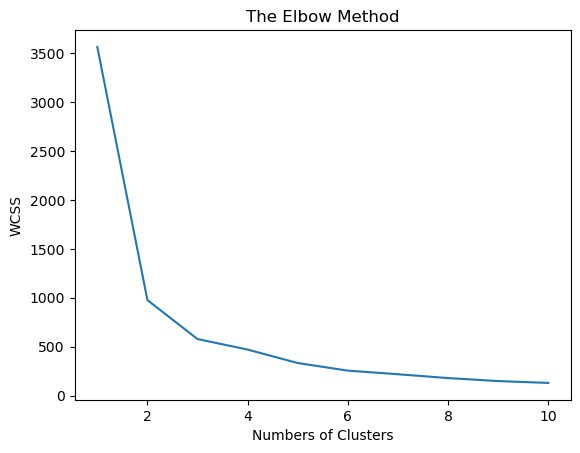

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# X = df.drop(columns=["Channel", "Region"]).values 
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmeans.fit(X_aniso)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_aniso)

KMeans(n_clusters=3)

#### WCSS dropping slowly or Sloppy Elbow

In [85]:
import sklearn.datasets as datasets
n_samples=500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)


In [102]:
kmeans.cluster_centers_

array([[-3.34257355,  2.90967032],
       [ 1.02650785, -0.87527581],
       [-2.51642919,  0.82280711]])

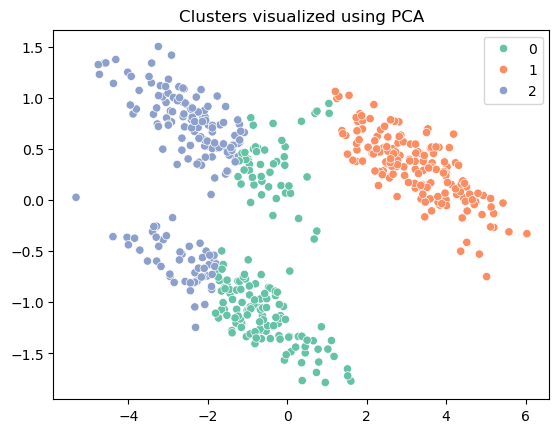

In [90]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_aniso)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='Set2')
plt.title("Clusters visualized using PCA")
plt.show()


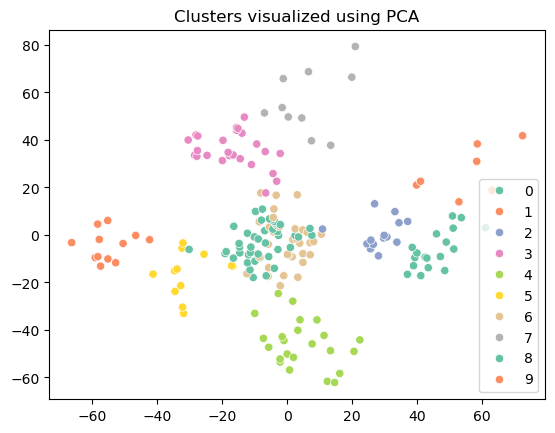

In [80]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='Set2')
plt.title("Clusters visualized using PCA")
plt.show()


### All points near origin or skewed, even after scaling

In [91]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.3575963460506624


In [92]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_aniso)
score = silhouette_score(X_aniso, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.5009600409392229


### Silhouette Score < 0.2
```
Ranges from -1 to 1.
    > 0.5 → clear clusters.
    ~ 0.2-0.4 → overlapping.
    < 0 → terrible clustering.
```
---

In [82]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X_scaled, kmeans.labels_)
print("DB Index:", score)  # Lower is better


DB Index: 0.9246692522251243


In [93]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X_aniso, kmeans.labels_)
print("DB Index:", score)  # Lower is better


DB Index: 0.7328560855058903


### No Idea, more research required

In [99]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

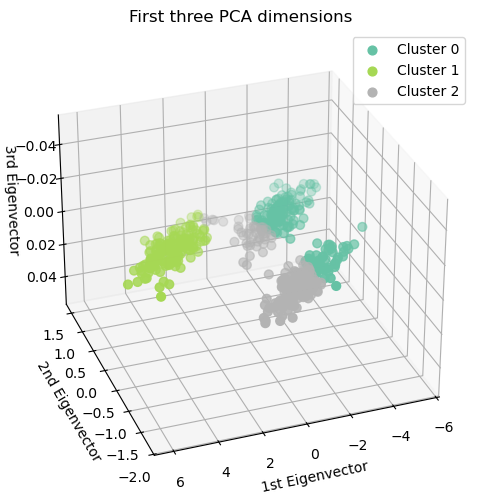

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D plotting is enabled
import numpy as np

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

pca = PCA().fit_transform(X_aniso)
labels = kmeans.labels_
unique_labels = np.unique(labels)
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster separately to get correct legend
for i, label in enumerate(unique_labels):
    ax.scatter(
        pca[labels == label, 0],
        pca[labels == label, 1],
        # pca[labels == label, 2],
        s=40,
        color=colors[i],
        label=f"Cluster {label}"
    )

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

plt.legend()
plt.show()
